# Trabalho IA Ética - Primeira Atividade

## Importando os Dados

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
import os
os.chdir('C:\\Users\\decmg\\OneDrive\\Documentos\\Material Disciplinas\\MO436-IA Ética\\Atividade 1')

In [3]:
os.listdir('data')

['adult.data',
 'adult.names',
 'adult.test',
 'atividade_1_adult.ipynb',
 'Index',
 'old.adult.names']

In [4]:
# Abrir e ler o arquivo adult.names
with open('data/adult.names', 'r') as file:
    names_content = file.read()



In [5]:
# Tive que setar o nome das colunas porque o dataset principal não carrega o nome das colunas
column_names = ['age','workclass','fnlwgt','education','education_num','marital_status','occupation','relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','income']

In [6]:
data_adult = pd.read_csv('data/adult.data', header=None, names=column_names)
data_adult.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
data_adult_test =  pd.read_csv('data/adult.test', names=column_names,skiprows=1)
data_adult_test.head()


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [9]:
#Shape
num_linhas, num_colunas = data_adult.shape
num_linhas,num_colunas

(32561, 15)

In [10]:
num_linhas_test,num_colunas_test =data_adult_test.shape
print(num_linhas_test,num_colunas_test)

16281 15


In [11]:
print(r'Proporção de Dados de Treino: ',num_linhas/(num_linhas + num_linhas_test),'.' , 'Proporção de Dados de Teste: ',num_linhas_test/(num_linhas + num_linhas_test))

Proporção de Dados de Treino:  0.6666598419393145 . Proporção de Dados de Teste:  0.33334015806068545


## Pré-Processamento

In [12]:
pd.isnull(data_adult).sum().sum(), pd.isnull(data_adult_test).sum().sum()
# Não há presença de missing values

(0, 0)

In [13]:
# Função para identificar se a variável é categórica ou numérica
def analisar_variavel(df):
    for column in df.columns:
        print(f"\nAnalisando a variável: {column}")

        if pd.api.types.is_numeric_dtype(df[column]):
            # Se for numérica, mostrar a distribuição
            print("Distribuição Numérica:")
            plt.figure(figsize=(8, 4))

            color = np.random.rand(3,)

            df[column].hist(bins=20, color=color)
            plt.title(f'Distribuição da variável {column}')
            plt.xlabel(column)
            plt.ylabel('Frequência')
            plt.show()
        else:
            # Se for categórica, mostrar value_counts
            print("Contagem de Valores Categóricos:")
            print(df[column].value_counts())

In [14]:
data_adult.sex.value_counts()

sex
 Male      21790
 Female    10771
Name: count, dtype: int64

In [15]:
pd.crosstab(data_adult.sex, data_adult.income)

income,<=50K,>50K
sex,,
Female,9592,1179
Male,15128,6662



Analisando a variável: age
Distribuição Numérica:


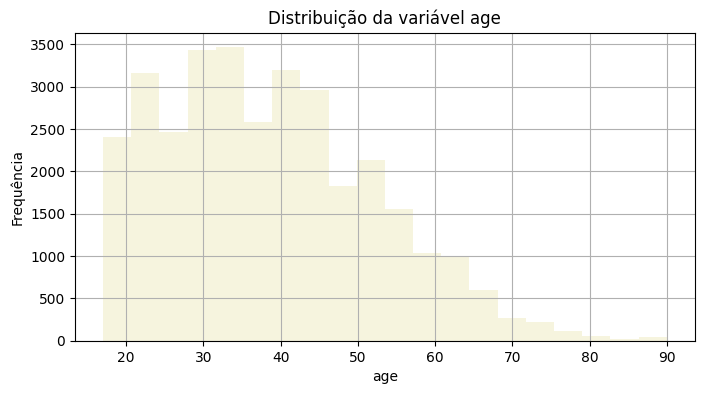


Analisando a variável: workclass
Contagem de Valores Categóricos:
workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64

Analisando a variável: fnlwgt
Distribuição Numérica:


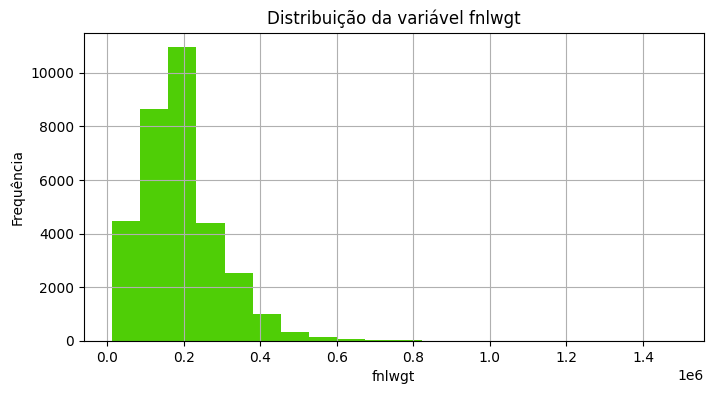


Analisando a variável: education
Contagem de Valores Categóricos:
education
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: count, dtype: int64

Analisando a variável: education_num
Distribuição Numérica:


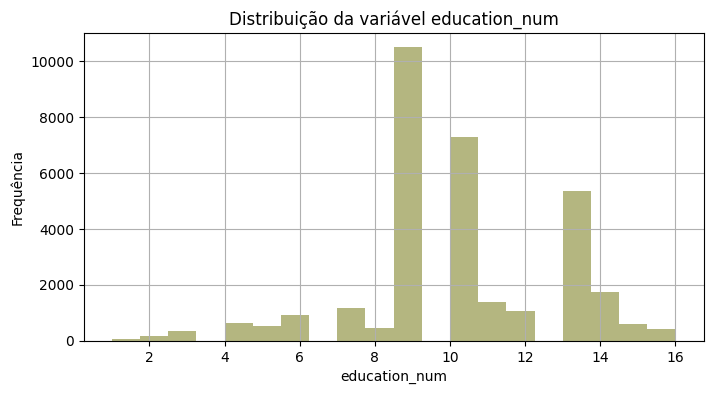


Analisando a variável: marital_status
Contagem de Valores Categóricos:
marital_status
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: count, dtype: int64

Analisando a variável: occupation
Contagem de Valores Categóricos:
occupation
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: count, dtype: int64

Analisando a variável: relationship
Contagem de Valores Categóricos:
relationship
 Husband           13193
 Not-in-family      8305
 Own-child          

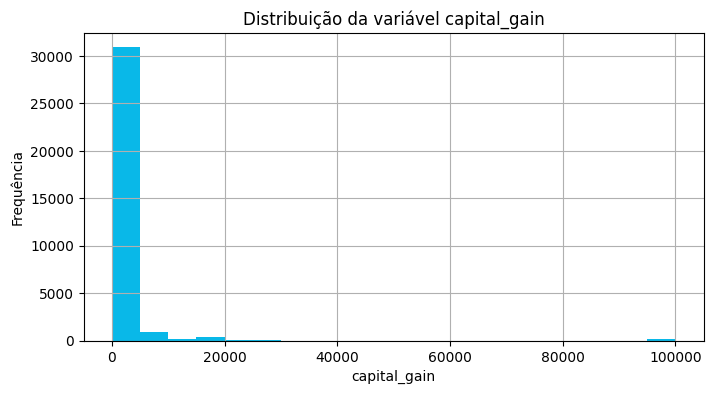


Analisando a variável: capital_loss
Distribuição Numérica:


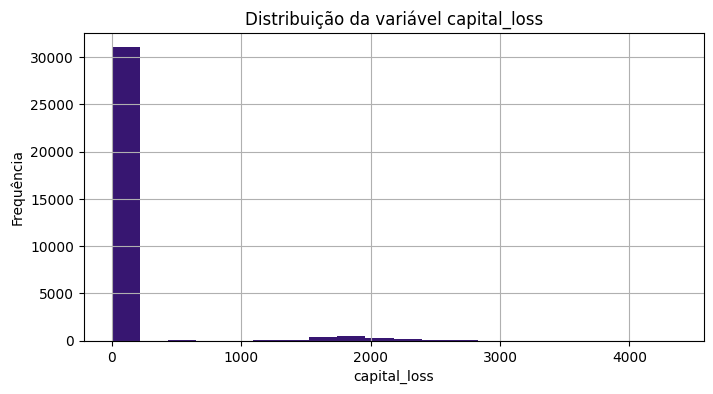


Analisando a variável: hours_per_week
Distribuição Numérica:


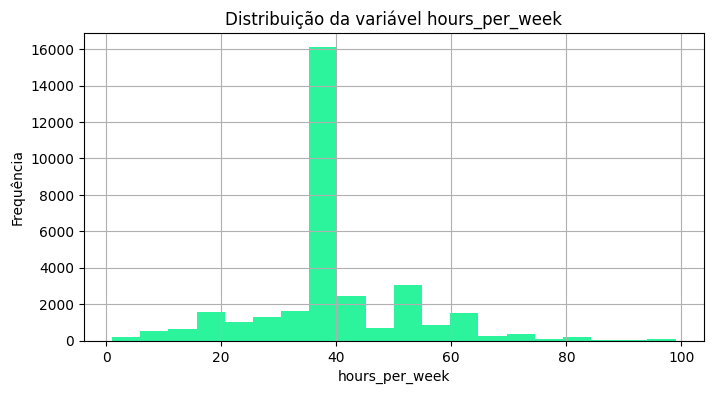


Analisando a variável: native_country
Contagem de Valores Categóricos:
native_country
 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                

In [16]:
analisar_variavel(data_adult)

In [17]:
for col in data_adult.columns:
    if data_adult[col].dtype == 'object':

        count = data_adult[col].str.contains('\?').sum()
        print(f"Há {count} amostras na coluna '{col}' com '?'")
 # Há amostras que possuem o caractere '?', Vou fazer algo para excluir

Há 1836 amostras na coluna 'workclass' com '?'
Há 0 amostras na coluna 'education' com '?'
Há 0 amostras na coluna 'marital_status' com '?'
Há 1843 amostras na coluna 'occupation' com '?'
Há 0 amostras na coluna 'relationship' com '?'
Há 0 amostras na coluna 'race' com '?'
Há 0 amostras na coluna 'sex' com '?'
Há 583 amostras na coluna 'native_country' com '?'
Há 0 amostras na coluna 'income' com '?'


In [18]:
def remover_amostras_com_interrogacao(df):
    for column in df.columns:
        if df[column].dtype == 'object':
            print(f"Verificando a coluna: {column}")


            contem_interrogacao = df[column].astype(str).str.contains('\?')

            if contem_interrogacao.any():
                num_amostras = contem_interrogacao.sum()

                print(f"Removendo {num_amostras} amostras da coluna {column} com '?'")

                df = df[~contem_interrogacao]
            else:
                print(f"Nenhum '?' encontrado na coluna {column}")

    return df

In [19]:
data_adult = remover_amostras_com_interrogacao(data_adult)

Verificando a coluna: workclass
Removendo 1836 amostras da coluna workclass com '?'
Verificando a coluna: education
Nenhum '?' encontrado na coluna education
Verificando a coluna: marital_status
Nenhum '?' encontrado na coluna marital_status
Verificando a coluna: occupation
Removendo 7 amostras da coluna occupation com '?'
Verificando a coluna: relationship
Nenhum '?' encontrado na coluna relationship
Verificando a coluna: race
Nenhum '?' encontrado na coluna race
Verificando a coluna: sex
Nenhum '?' encontrado na coluna sex
Verificando a coluna: native_country
Removendo 556 amostras da coluna native_country com '?'
Verificando a coluna: income
Nenhum '?' encontrado na coluna income


In [20]:
data_adult # Excluidas as colunas categóricas cujos valores possuiam '?'

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [21]:
# removendo "espaços" indesejados  
data_adult = data_adult.apply(lambda col: col.str.strip() if col.dtype == 'object' else col)
data_adult

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [22]:
data_adult['income'] = data_adult['income'].map({'<=50K':1,'>50K':0})
data_adult.income.value_counts()

income
1    22654
0     7508
Name: count, dtype: int64

In [23]:
data_adult['sex'] = data_adult['sex'].map({'Male':0,'Female':1})
data_adult.sex.value_counts()

sex
0    20380
1     9782
Name: count, dtype: int64

In [24]:
# Categorizando Native Conuntry
data_adult['race'] = np.where(data_adult['race'] == 'White', 0, 1)
data_adult.race.value_counts()

race
0    25933
1     4229
Name: count, dtype: int64

In [25]:
data_adult.native_country.unique

data_adult['native_country'] = np.where(data_adult['native_country'] == 'United-States',0,1)
data_adult.native_country.value_counts()

native_country
0    27504
1     2658
Name: count, dtype: int64

In [26]:
data_adult.loc[:,data_adult.dtypes == 'object'].columns.tolist()

['workclass', 'education', 'marital_status', 'occupation', 'relationship']

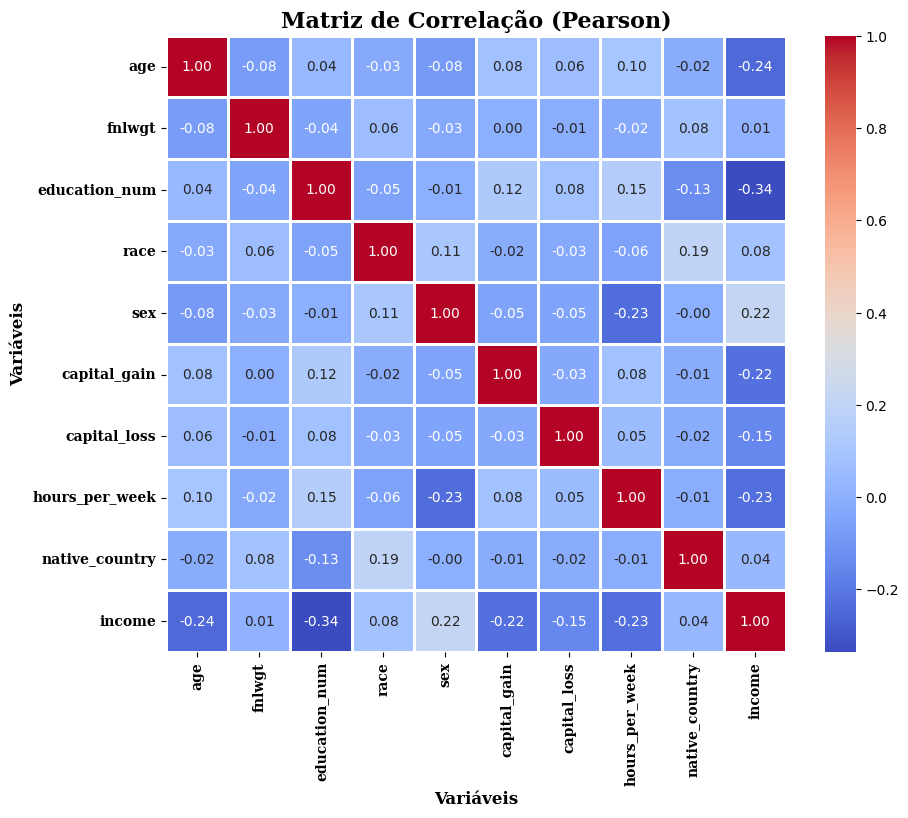

,age,fnlwgt,education_num,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
age,1.000000,-0.076511,0.043526,-0.026906,-0.081993,0.080154,0.060165,0.101599,-0.016259,-0.241998
fnlwgt,-0.076511,1.000000,-0.044992,0.058804,-0.025362,0.000422,-0.009750,-0.022886,0.083390,0.008957
education_num,0.043526,-0.044992,1.000000,-0.052615,-0.006157,0.124416,0.079646,0.152522,-0.127207,-0.335286
race,-0.026906,0.058804,-0.052615,1.000000,0.105148,-0.016933,-0.026197,-0.056404,0.192115,0.084735
sex,-0.081993,-0.025362,-0.006157,0.105148,1.000000,-0.048814,-0.047011,-0.231268,-0.003006,0.216699
capital_gain,0.080154,0.000422,0.124416,-0.016933,-0.048814,1.000000,-0.032229,0.080432,-0.012375,-0.221196
capital_loss,0.060165,-0.009750,0.079646,-0.026197,-0.047011,-0.032229,1.000000,0.052417,-0.015119,-0.150053
hours_per_week,0.101599,-0.022886,0.152522,-0.056404,-0.231268,0.080432,0.052417,1.000000,-0.010673,-0.229480
native_country,-0.016259,0.083390,-0.127207,0.192115,-0.003006,-0.012375,-0.015119,-0.010673,1.000000,0.040204
income,-0.241998,0.008957,-0.335286,0.084735,0.216699,-0.221196,-0.150053,-0.229480,0.040204,1.000000


In [27]:
def correlacao_personalizada_plot(df, colunas=None, metodo='pearson'):
    """
    Calcula e plota a correlação entre colunas numéricas de um DataFrame.
    
    Parâmetros:
        df (pd.DataFrame): O DataFrame com os dados.
        colunas (list ou None): Lista das colunas para as quais deseja calcular a correlação. Se None, utiliza todas as colunas numéricas.
        metodo (str): Método de correlação ('pearson', 'spearman', ou 'kendall'). Padrão é 'pearson'.
        
    Retorno:
        pd.DataFrame: Matriz de correlação entre as colunas especificadas.
    """
    
    if colunas is None:
        df_selecionado = df.select_dtypes(include=[float, int])
    else:
        if not all(col in df.columns for col in colunas):
            raise ValueError("Algumas colunas fornecidas não estão presentes no DataFrame.")
        df_selecionado = df[colunas]
    
    correlacao = df_selecionado.corr(method=metodo)
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlacao, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.8)
    
    plt.title(f'Matriz de Correlação ({metodo.title()})', fontdict={'family': 'serif', 'weight': 'bold', 'size': 16})
    
    plt.xlabel('Variáveis', fontdict={'family': 'serif', 'weight': 'bold', 'size': 12})
    plt.ylabel('Variáveis', fontdict={'family': 'serif', 'weight': 'bold', 'size': 12})
    
    plt.xticks(fontsize=10, fontweight='bold', fontfamily='serif')
    plt.yticks(fontsize=10, fontweight='bold', fontfamily='serif')
    
    plt.show()
    
    return correlacao

correlacao_personalizada_plot(data_adult)


### Estatísticas descritivas das features numéricas

In [28]:
numerical_features = data_adult.select_dtypes(include=['float64', 'int64'])

statistics = numerical_features.describe()

print(statistics)

                age        fnlwgt  education_num           sex  capital_gain  \
count  30162.000000  3.016200e+04   30162.000000  30162.000000  30162.000000   
mean      38.437902  1.897938e+05      10.121312      0.324315   1092.007858   
std       13.134665  1.056530e+05       2.549995      0.468126   7406.346497   
min       17.000000  1.376900e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.176272e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.784250e+05      10.000000      0.000000      0.000000   
75%       47.000000  2.376285e+05      13.000000      1.000000      0.000000   
max       90.000000  1.484705e+06      16.000000      1.000000  99999.000000   

       capital_loss  hours_per_week        income  
count  30162.000000    30162.000000  30162.000000  
mean      88.372489       40.931238      0.751078  
std      404.298370       11.979984      0.432396  
min        0.000000        1.000000      0.000000  
25%        0.000000

## Reconhecendo Atributos Sensíveis e Tratamento de Dados

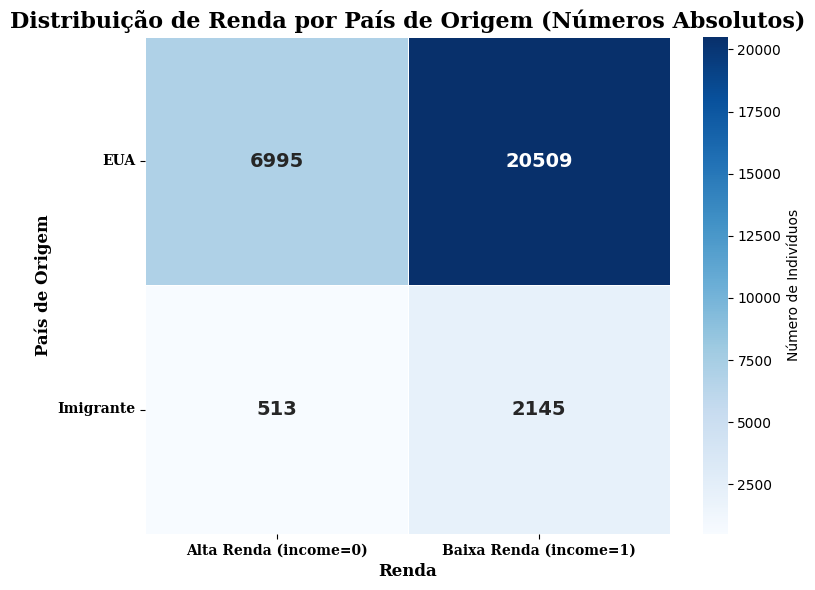

In [29]:
def plot_income_vs_native_country_absolute(df, native_country_column, income_column):
    df_copy = df.copy()

    df_copy[native_country_column] = df_copy[native_country_column].map({0: 'EUA', 1: 'Imigrante'})
    
    comparison_table = df_copy.groupby([native_country_column, income_column]).size().unstack(fill_value=0)

    comparison_table['Total'] = comparison_table.sum(axis=1)
    comparison_table = comparison_table.sort_values(by='Total', ascending=False)

    plt.figure(figsize=(8, 6))  # Ajuste do tamanho do gráfico para visualização de país de origem
    sns.heatmap(comparison_table[[0, 1]], 
                annot=True, cmap="Blues", fmt="d", linewidths=.5, cbar_kws={'label': 'Número de Indivíduos'},
                annot_kws={"weight": "bold", "size": 14})  # Aumenta o tamanho da fonte dos números

    plt.title('Distribuição de Renda por País de Origem (Números Absolutos)', fontdict={'family': 'serif', 'weight': 'bold', 'size': 16})
    
    plt.xlabel('Renda', fontdict={'family': 'serif', 'weight': 'bold', 'size': 12})
    plt.ylabel('País de Origem', fontdict={'family': 'serif', 'weight': 'bold', 'size': 12})
        
    plt.yticks([0.5, 1.5], ['EUA', 'Imigrante'], rotation=0, fontsize=10, fontweight='bold', fontfamily='serif')
    
    plt.xticks([0.5, 1.5], ['Alta Renda (income=0)', 'Baixa Renda (income=1)'], rotation=0, fontsize=10, fontweight='bold', fontfamily='serif')
    
    plt.tight_layout()
    plt.show()

plot_income_vs_native_country_absolute(data_adult, 'native_country', 'income')

In [30]:
pd.crosstab(data_adult.native_country,data_adult.income,margins=True)

income,0,1,All
native_country,,,
0,6995,20509,27504
1,513,2145,2658
All,7508,22654,30162


In [31]:
data_adult.race.value_counts()

race
0    25933
1     4229
Name: count, dtype: int64

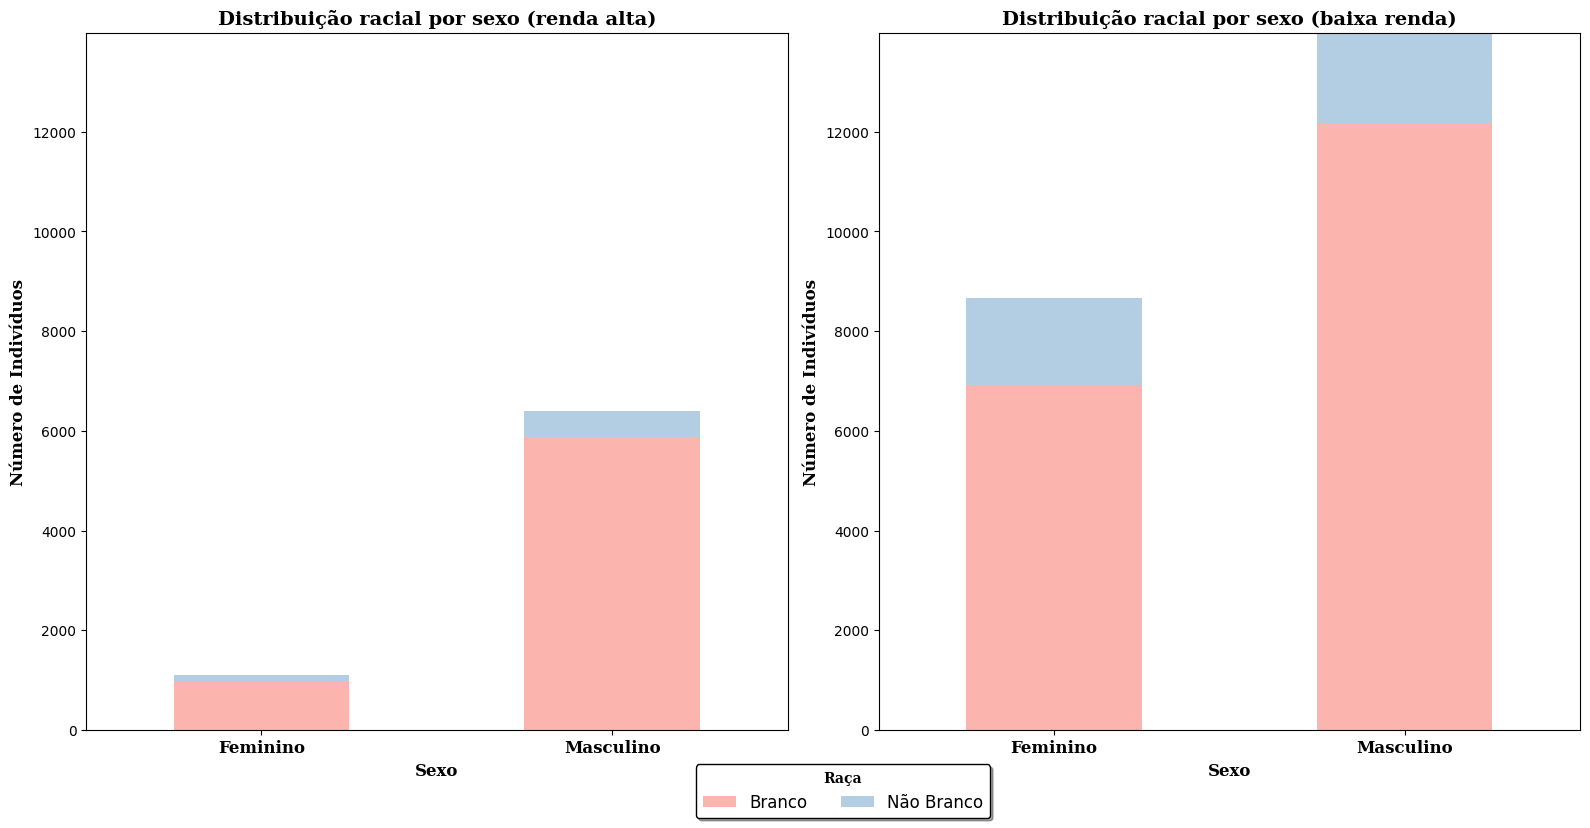

In [32]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_income_race_sex_stacked_bar_dual_standardized_y(df, sex_column, race_column, income_column):

    df_copy = df.copy()
    df_copy[sex_column] = df_copy[sex_column].map({0: 'Masculino', 1: 'Feminino'})
    df_copy[race_column] = df_copy[race_column].map({0: 'Branco', 1: 'Não Branco'})
    
    high_income = df_copy[df_copy[income_column] == 0]
    low_income = df_copy[df_copy[income_column] == 1]

    high_income_grouped = high_income.groupby([sex_column, race_column]).size().unstack(fill_value=0)
    low_income_grouped = low_income.groupby([sex_column, race_column]).size().unstack(fill_value=0)

    max_y = max(high_income_grouped.sum(axis=1).max(), low_income_grouped.sum(axis=1).max())

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

    pastel_colors = plt.cm.Pastel1.colors

    # Gráfico para High Income
    high_income_grouped.plot(kind='bar', stacked=True, color=pastel_colors, ax=ax1)
    ax1.set_title('Distribuição racial por sexo (renda alta)', fontdict={'family': 'serif', 'weight': 'bold', 'size': 14})
    ax1.set_xlabel('Sexo', fontdict={'family': 'serif', 'weight': 'bold', 'size': 12})
    ax1.set_ylabel('Número de Indivíduos', fontdict={'family': 'serif', 'weight': 'bold', 'size': 12})
    ax1.set_ylim(0, max_y)
    ax1.get_legend().remove()

    # Ajusta os rótulos do eixo X para melhorar a visibilidade
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0, fontsize=12, fontweight='bold', fontfamily='serif')

    # Gráfico para Low Income
    low_income_grouped.plot(kind='bar', stacked=True, color=pastel_colors, ax=ax2)
    ax2.set_title('Distribuição racial por sexo (baixa renda)', fontdict={'family': 'serif', 'weight': 'bold', 'size': 14})
    ax2.set_xlabel('Sexo', fontdict={'family': 'serif', 'weight': 'bold', 'size': 12})
    ax2.set_ylabel('Número de Indivíduos', fontdict={'family': 'serif', 'weight': 'bold', 'size': 12})
    ax2.set_ylim(0, max_y)
    ax2.get_legend().remove()

    # Ajusta os rótulos do eixo X para melhorar a visibilidade
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0, fontsize=12, fontweight='bold', fontfamily='serif')

    # Legenda configurada com uma caixa de fundo para melhor visibilidade
    legend = fig.legend(title='Raça', labels=[ 'Branco','Não Branco'], loc='lower center', ncol=2, bbox_to_anchor=(0.53, -.04), 
                        title_fontproperties={'weight': 'bold', 'family': 'serif'}, fontsize=12, frameon=True, fancybox=True, shadow=True)
    
    # Adiciona fundo branco à caixa da legenda
    legend.get_frame().set_facecolor('white')
    legend.get_frame().set_edgecolor('black')

    plt.tight_layout()
    plt.show()

plot_income_race_sex_stacked_bar_dual_standardized_y(data_adult, 'sex', 'race', 'income')

In [33]:
data_adult.native_country.value_counts(normalize=True)

native_country
0    0.911876
1    0.088124
Name: proportion, dtype: float64

In [34]:
data_adult.sex.value_counts(normalize=True)

sex
0    0.675685
1    0.324315
Name: proportion, dtype: float64

In [35]:
data_adult.race.value_counts(normalize=True)

race
0    0.85979
1    0.14021
Name: proportion, dtype: float64

In [36]:
data_adult.income.value_counts(normalize=True)

income
1    0.751078
0    0.248922
Name: proportion, dtype: float64

### Aplicando codificaçao One Hot antes do split

In [37]:
cols_to_encode = ['workclass', 'education', 'marital_status', 'occupation',
       'relationship']


df_encoded = pd.get_dummies(data_adult[cols_to_encode], drop_first=True, dtype=int)

df_remaining = data_adult.drop(columns=cols_to_encode)

df_final = pd.concat([df_remaining, df_encoded], axis=1)


data_adult = df_final

In [101]:
data_adult.loc[:,data_adult.dtypes == 'object'].columns

Index([], dtype='object')

In [102]:
data_adult.shape[0]/0.66*0.2/data_adult.shape[0]

0.30303030303030304

In [103]:
# X_train.shape[0]/(data_adult_test.shape[0]+ data_adult.shape[0]),X_val.shape[0]/(data_adult_test.shape[0]+ data_adult.shape[0]),data_adult_test.shape[0]/(data_adult_test.shape[0]+ data_adult.shape[0])

In [38]:
# Teste : 33%, Treino:
X_train, X_val, y_train, y_val = train_test_split(data_adult.drop(['income'],axis=1),data_adult.income, train_size=.85, random_state=42)
X_train.shape,y_train.shape , X_val.shape,y_val.shape

((25637, 54), (25637,), (4525, 54), (4525,))

In [39]:
X_train.shape[0]/(data_adult.shape[0])

0.849976791989921

In [40]:
X_train

,age,fnlwgt,education_num,race,sex,capital_gain,capital_loss,hours_per_week,native_country,workclass_Local-gov,...,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife
26856,23,353010,7,0,0,0,0,35,0,0,...,0,0,0,0,0,0,0,0,1,0
13458,48,152953,4,0,0,0,0,32,1,0,...,0,0,0,0,0,0,0,0,0,0
25271,36,218490,13,0,0,0,0,45,1,0,...,1,0,0,0,0,0,0,0,0,0
31148,40,330174,15,0,0,7688,0,40,0,0,...,1,0,0,0,0,0,0,0,0,0
15785,47,370119,15,0,0,0,0,50,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32171,40,67852,9,0,0,0,0,35,0,0,...,0,0,0,0,1,1,0,0,0,0
5875,41,120539,10,0,0,3103,0,40,0,0,...,0,0,0,0,0,0,0,0,0,0
935,37,176900,9,0,0,0,0,99,0,0,...,0,0,0,0,0,0,0,0,0,0
17056,56,51662,7,0,1,0,0,40,0,0,...,0,0,0,0,0,0,0,0,0,1


### Normalizacao dos Dados

In [41]:
from sklearn.preprocessing import MinMaxScaler
cols_to_normalize = ['age', 'hours_per_week','education_num','capital_gain','capital_loss']

# Criar o MinMaxScaler
scaler = MinMaxScaler()

# Aplicar o scaler apenas nas colunas selecionadas
X_train[cols_to_normalize] = scaler.fit_transform(X_train[cols_to_normalize])

# Exibir o dataframe final com as variáveis normalizadas
X_train

,age,fnlwgt,education_num,race,sex,capital_gain,capital_loss,hours_per_week,native_country,workclass_Local-gov,...,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife
26856,0.082192,353010,0.400000,0,0,0.000000,0.0,0.346939,0,0,...,0,0,0,0,0,0,0,0,1,0
13458,0.424658,152953,0.200000,0,0,0.000000,0.0,0.316327,1,0,...,0,0,0,0,0,0,0,0,0,0
25271,0.260274,218490,0.800000,0,0,0.000000,0.0,0.448980,1,0,...,1,0,0,0,0,0,0,0,0,0
31148,0.315068,330174,0.933333,0,0,0.076881,0.0,0.397959,0,0,...,1,0,0,0,0,0,0,0,0,0
15785,0.410959,370119,0.933333,0,0,0.000000,0.0,0.500000,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32171,0.315068,67852,0.533333,0,0,0.000000,0.0,0.346939,0,0,...,0,0,0,0,1,1,0,0,0,0
5875,0.328767,120539,0.600000,0,0,0.031030,0.0,0.397959,0,0,...,0,0,0,0,0,0,0,0,0,0
935,0.273973,176900,0.533333,0,0,0.000000,0.0,1.000000,0,0,...,0,0,0,0,0,0,0,0,0,0
17056,0.534247,51662,0.400000,0,1,0.000000,0.0,0.397959,0,0,...,0,0,0,0,0,0,0,0,0,1


In [42]:
# Para a Validação

from sklearn.preprocessing import MinMaxScaler
cols_to_normalize = ['age', 'hours_per_week','education_num','capital_gain','capital_loss']
scaler = MinMaxScaler()

X_val[cols_to_normalize] = scaler.fit_transform(X_val[cols_to_normalize])

X_val

,age,fnlwgt,education_num,race,sex,capital_gain,capital_loss,hours_per_week,native_country,workclass_Local-gov,...,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife
234,0.150685,76714,0.933333,0,0,0.0,0.0,0.551020,0,0,...,1,0,0,0,0,1,0,0,0,0
26879,0.328767,178431,0.533333,1,0,0.0,0.0,0.397959,1,0,...,0,0,0,0,0,0,0,0,0,0
19182,0.493151,290640,0.533333,0,0,0.0,0.0,0.500000,1,0,...,0,0,0,0,0,0,0,0,0,0
13485,0.191781,215297,0.533333,0,0,0.0,0.0,0.448980,0,0,...,0,0,0,0,0,0,0,0,0,0
9625,0.232877,188682,0.800000,0,1,0.0,0.0,0.397959,0,1,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19062,0.273973,170174,0.533333,0,0,0.0,0.0,0.459184,0,0,...,0,0,0,0,0,0,0,0,0,0
488,0.383562,164427,0.800000,0,1,0.0,0.0,0.397959,0,1,...,1,0,0,0,0,0,0,0,1,0
530,0.369863,109339,0.400000,1,1,0.0,0.0,0.459184,1,0,...,0,0,0,0,0,0,0,0,1,0
31063,0.547945,175942,0.600000,0,0,0.0,0.0,0.244898,0,0,...,0,0,0,0,0,0,1,0,0,0


In [43]:
X_train

,age,fnlwgt,education_num,race,sex,capital_gain,capital_loss,hours_per_week,native_country,workclass_Local-gov,...,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife
26856,0.082192,353010,0.400000,0,0,0.000000,0.0,0.346939,0,0,...,0,0,0,0,0,0,0,0,1,0
13458,0.424658,152953,0.200000,0,0,0.000000,0.0,0.316327,1,0,...,0,0,0,0,0,0,0,0,0,0
25271,0.260274,218490,0.800000,0,0,0.000000,0.0,0.448980,1,0,...,1,0,0,0,0,0,0,0,0,0
31148,0.315068,330174,0.933333,0,0,0.076881,0.0,0.397959,0,0,...,1,0,0,0,0,0,0,0,0,0
15785,0.410959,370119,0.933333,0,0,0.000000,0.0,0.500000,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32171,0.315068,67852,0.533333,0,0,0.000000,0.0,0.346939,0,0,...,0,0,0,0,1,1,0,0,0,0
5875,0.328767,120539,0.600000,0,0,0.031030,0.0,0.397959,0,0,...,0,0,0,0,0,0,0,0,0,0
935,0.273973,176900,0.533333,0,0,0.000000,0.0,1.000000,0,0,...,0,0,0,0,0,0,0,0,0,0
17056,0.534247,51662,0.400000,0,1,0.000000,0.0,0.397959,0,0,...,0,0,0,0,0,0,0,0,0,1


In [48]:
y_train.value_counts()

income
1    19253
0     6384
Name: count, dtype: int64

In [47]:
y_val.value_counts()

income
1    3401
0    1124
Name: count, dtype: int64

## Exportando Dados Tratados e conjunto de treino e validacao 

In [49]:
data_adult.to_csv('C:\\Users\\decmg\\OneDrive\\Documentos\\Material Disciplinas\\MO436-IA Ética\\Atividade 1\\data_adult_tratado.csv')

In [50]:
X_train.to_csv('C:\\Users\\decmg\\OneDrive\\Documentos\\Material Disciplinas\\MO436-IA Ética\\Atividade 1\\X_train.csv')
y_train.to_csv('C:\\Users\\decmg\\OneDrive\\Documentos\\Material Disciplinas\\MO436-IA Ética\\Atividade 1\\y_train.csv')

In [51]:
X_val.to_csv('C:\\Users\\decmg\\OneDrive\\Documentos\\Material Disciplinas\\MO436-IA Ética\\Atividade 1\\X_val.csv')
y_val.to_csv('C:\\Users\\decmg\\OneDrive\\Documentos\\Material Disciplinas\\MO436-IA Ética\\Atividade 1\\y_val.csv')